In [1]:
from keras.datasets import boston_housing

import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = '3'  # 只显示 Error

Using TensorFlow backend.


In [2]:
# boston房价数据集，预测房价变化
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

print('train_data shape ', train_data.shape)
print('test_data.shape ', test_data.shape)

train_data shape  (404, 13)
test_data.shape  (102, 13)


In [3]:
# 预处理数据，转化为正态分布
mean = train_data.mean(axis=0)  # 求均值
train_data -= mean

std = train_data.std(axis=0)  # 求标准差
train_data /= std

test_data -= mean
test_data /= std

In [4]:
# 搭建模型

from keras import models
from keras import layers


def build_network():
    network = models.Sequential()
    network.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1], )))
    network.add(layers.Dense(64, activation='relu'))
    network.add(layers.Dense(1))
    network.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])  # 均方误差作为损失
    return network

# k-fold 验证 , 基于numpy实现
import numpy as np

k = 4
num_val_samples = len(train_data)//k
num_epochs = 500
all_scores = []
all_mae_histories = []

for i in range(k):
    print("processing fold #", i)
    # Prepare the validation data
    val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples: (i+1)*num_val_samples]

    #准备培训数据：来自所有其他分区的数据
    partial_train_data = np.concatenate(
                            [train_data[: i*num_val_samples],
                             train_data[(i+1)*num_val_samples:]],
                            axis=0
                            )
    partial_train_targets = np.concatenate(
                            [train_targets[: i*num_val_samples],
                             train_targets[(i+1)*num_val_samples:]],
                            axis=0
                            )
    network = build_network()
    # 记录每次迭代的训练集和验证集 acc和loss
    history = network.fit(partial_train_data, partial_train_targets, epochs=num_epochs,
                          batch_size=1, verbose=2,
                          validation_data=(val_data, val_targets))

    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)
    # val_mse, val_mae = network.evaluate(val_data, val_targets, verbose=1)
    #
    # all_scores.append(val_mae)

processing fold # 0
Train on 303 samples, validate on 101 samples
Epoch 1/500
 - 2s - loss: 202.3814 - mean_absolute_error: 10.7722 - val_loss: 35.6699 - val_mean_absolute_error: 4.0277
Epoch 2/500
 - 1s - loss: 30.2373 - mean_absolute_error: 3.8334 - val_loss: 20.8735 - val_mean_absolute_error: 3.1098
Epoch 3/500
 - 1s - loss: 21.3092 - mean_absolute_error: 3.1753 - val_loss: 20.0278 - val_mean_absolute_error: 2.9640
Epoch 4/500
 - 1s - loss: 18.2486 - mean_absolute_error: 2.8959 - val_loss: 18.2133 - val_mean_absolute_error: 2.7662
Epoch 5/500
 - 1s - loss: 16.6024 - mean_absolute_error: 2.6640 - val_loss: 14.4925 - val_mean_absolute_error: 2.6143
Epoch 6/500
 - 1s - loss: 15.4888 - mean_absolute_error: 2.5713 - val_loss: 15.5081 - val_mean_absolute_error: 2.8297
Epoch 7/500
 - 1s - loss: 14.2158 - mean_absolute_error: 2.5346 - val_loss: 11.6177 - val_mean_absolute_error: 2.1780
Epoch 8/500
 - 1s - loss: 13.8676 - mean_absolute_error: 2.4219 - val_loss: 10.9579 - val_mean_absolute_er

Epoch 71/500
 - 1s - loss: 5.4686 - mean_absolute_error: 1.5062 - val_loss: 8.7926 - val_mean_absolute_error: 2.1148
Epoch 72/500
 - 1s - loss: 5.3648 - mean_absolute_error: 1.4565 - val_loss: 8.8046 - val_mean_absolute_error: 2.1531
Epoch 73/500
 - 1s - loss: 5.2525 - mean_absolute_error: 1.4372 - val_loss: 9.1539 - val_mean_absolute_error: 2.1955
Epoch 74/500
 - 1s - loss: 5.1318 - mean_absolute_error: 1.4939 - val_loss: 9.2450 - val_mean_absolute_error: 2.1775
Epoch 75/500
 - 1s - loss: 5.0953 - mean_absolute_error: 1.5147 - val_loss: 8.0042 - val_mean_absolute_error: 2.1145
Epoch 76/500
 - 1s - loss: 5.3934 - mean_absolute_error: 1.4860 - val_loss: 8.0099 - val_mean_absolute_error: 2.0336
Epoch 77/500
 - 1s - loss: 5.2305 - mean_absolute_error: 1.4204 - val_loss: 7.6903 - val_mean_absolute_error: 2.0564
Epoch 78/500
 - 1s - loss: 5.4523 - mean_absolute_error: 1.5135 - val_loss: 8.7649 - val_mean_absolute_error: 2.1148
Epoch 79/500
 - 1s - loss: 4.9771 - mean_absolute_error: 1.4175 

Epoch 141/500
 - 1s - loss: 3.0883 - mean_absolute_error: 1.1740 - val_loss: 8.1929 - val_mean_absolute_error: 2.1594
Epoch 142/500
 - 1s - loss: 2.8118 - mean_absolute_error: 1.1821 - val_loss: 9.2299 - val_mean_absolute_error: 2.2776
Epoch 143/500
 - 1s - loss: 2.9452 - mean_absolute_error: 1.1085 - val_loss: 9.9513 - val_mean_absolute_error: 2.2972
Epoch 144/500
 - 1s - loss: 2.9421 - mean_absolute_error: 1.1225 - val_loss: 8.0542 - val_mean_absolute_error: 2.0944
Epoch 145/500
 - 1s - loss: 2.7864 - mean_absolute_error: 1.1662 - val_loss: 7.8473 - val_mean_absolute_error: 2.1155
Epoch 146/500
 - 1s - loss: 3.2469 - mean_absolute_error: 1.2448 - val_loss: 7.8985 - val_mean_absolute_error: 2.1084
Epoch 147/500
 - 1s - loss: 2.8646 - mean_absolute_error: 1.1225 - val_loss: 9.2068 - val_mean_absolute_error: 2.3546
Epoch 148/500
 - 1s - loss: 3.0082 - mean_absolute_error: 1.1682 - val_loss: 8.6714 - val_mean_absolute_error: 2.1596
Epoch 149/500
 - 1s - loss: 2.8731 - mean_absolute_error

Epoch 211/500
 - 1s - loss: 1.7355 - mean_absolute_error: 0.9331 - val_loss: 9.3326 - val_mean_absolute_error: 2.3388
Epoch 212/500
 - 1s - loss: 1.9727 - mean_absolute_error: 1.0096 - val_loss: 10.8512 - val_mean_absolute_error: 2.3971
Epoch 213/500
 - 1s - loss: 2.0977 - mean_absolute_error: 0.9723 - val_loss: 9.8341 - val_mean_absolute_error: 2.2362
Epoch 214/500
 - 1s - loss: 1.7472 - mean_absolute_error: 0.9467 - val_loss: 10.5665 - val_mean_absolute_error: 2.4005
Epoch 215/500
 - 1s - loss: 1.7909 - mean_absolute_error: 0.9444 - val_loss: 8.5931 - val_mean_absolute_error: 2.2678
Epoch 216/500
 - 1s - loss: 1.7438 - mean_absolute_error: 0.9467 - val_loss: 10.2315 - val_mean_absolute_error: 2.3992
Epoch 217/500
 - 1s - loss: 1.8148 - mean_absolute_error: 0.9964 - val_loss: 10.2885 - val_mean_absolute_error: 2.3019
Epoch 218/500
 - 1s - loss: 1.7446 - mean_absolute_error: 0.9695 - val_loss: 9.1306 - val_mean_absolute_error: 2.2453
Epoch 219/500
 - 1s - loss: 1.8354 - mean_absolute_e

Epoch 281/500
 - 1s - loss: 1.3525 - mean_absolute_error: 0.8494 - val_loss: 9.6573 - val_mean_absolute_error: 2.3847
Epoch 282/500
 - 1s - loss: 1.5558 - mean_absolute_error: 0.8972 - val_loss: 10.0331 - val_mean_absolute_error: 2.3488
Epoch 283/500
 - 1s - loss: 1.2813 - mean_absolute_error: 0.8090 - val_loss: 9.5100 - val_mean_absolute_error: 2.3180
Epoch 284/500
 - 1s - loss: 1.6772 - mean_absolute_error: 0.9155 - val_loss: 11.2741 - val_mean_absolute_error: 2.5279
Epoch 285/500
 - 1s - loss: 1.2794 - mean_absolute_error: 0.8612 - val_loss: 9.9816 - val_mean_absolute_error: 2.4028
Epoch 286/500
 - 1s - loss: 1.5126 - mean_absolute_error: 0.8774 - val_loss: 10.0220 - val_mean_absolute_error: 2.3579
Epoch 287/500
 - 1s - loss: 1.5312 - mean_absolute_error: 0.8958 - val_loss: 9.4499 - val_mean_absolute_error: 2.3675
Epoch 288/500
 - 1s - loss: 1.3740 - mean_absolute_error: 0.8728 - val_loss: 9.9179 - val_mean_absolute_error: 2.3474
Epoch 289/500
 - 1s - loss: 1.4584 - mean_absolute_er

 - 1s - loss: 1.1580 - mean_absolute_error: 0.7532 - val_loss: 10.6447 - val_mean_absolute_error: 2.4396
Epoch 351/500
 - 1s - loss: 1.1284 - mean_absolute_error: 0.7364 - val_loss: 9.8871 - val_mean_absolute_error: 2.3964
Epoch 352/500
 - 1s - loss: 1.1085 - mean_absolute_error: 0.7708 - val_loss: 10.5376 - val_mean_absolute_error: 2.5183
Epoch 353/500
 - 1s - loss: 1.2416 - mean_absolute_error: 0.7650 - val_loss: 10.0894 - val_mean_absolute_error: 2.3649
Epoch 354/500
 - 1s - loss: 0.9740 - mean_absolute_error: 0.7462 - val_loss: 9.4623 - val_mean_absolute_error: 2.3936
Epoch 355/500
 - 1s - loss: 1.4745 - mean_absolute_error: 0.8401 - val_loss: 10.9145 - val_mean_absolute_error: 2.5116
Epoch 356/500
 - 1s - loss: 1.1660 - mean_absolute_error: 0.7542 - val_loss: 11.8319 - val_mean_absolute_error: 2.4821
Epoch 357/500
 - 1s - loss: 1.2148 - mean_absolute_error: 0.7603 - val_loss: 9.6794 - val_mean_absolute_error: 2.3290
Epoch 358/500
 - 1s - loss: 1.0869 - mean_absolute_error: 0.8066 

Epoch 420/500
 - 1s - loss: 1.0715 - mean_absolute_error: 0.7605 - val_loss: 10.2038 - val_mean_absolute_error: 2.3351
Epoch 421/500
 - 1s - loss: 1.0823 - mean_absolute_error: 0.7506 - val_loss: 10.8160 - val_mean_absolute_error: 2.4495
Epoch 422/500
 - 1s - loss: 1.1137 - mean_absolute_error: 0.7316 - val_loss: 10.8385 - val_mean_absolute_error: 2.4644
Epoch 423/500
 - 1s - loss: 0.9861 - mean_absolute_error: 0.6956 - val_loss: 11.0848 - val_mean_absolute_error: 2.4837
Epoch 424/500
 - 1s - loss: 0.9470 - mean_absolute_error: 0.7222 - val_loss: 10.3271 - val_mean_absolute_error: 2.3483
Epoch 425/500
 - 1s - loss: 0.8872 - mean_absolute_error: 0.6948 - val_loss: 11.6202 - val_mean_absolute_error: 2.4856
Epoch 426/500
 - 1s - loss: 0.9403 - mean_absolute_error: 0.7006 - val_loss: 10.4602 - val_mean_absolute_error: 2.4006
Epoch 427/500
 - 1s - loss: 1.0935 - mean_absolute_error: 0.7254 - val_loss: 11.5693 - val_mean_absolute_error: 2.5715
Epoch 428/500
 - 1s - loss: 0.9155 - mean_absolu

Epoch 489/500
 - 1s - loss: 0.8984 - mean_absolute_error: 0.6973 - val_loss: 10.7554 - val_mean_absolute_error: 2.4511
Epoch 490/500
 - 1s - loss: 0.9116 - mean_absolute_error: 0.6583 - val_loss: 10.7393 - val_mean_absolute_error: 2.5035
Epoch 491/500
 - 1s - loss: 0.8250 - mean_absolute_error: 0.6603 - val_loss: 10.6848 - val_mean_absolute_error: 2.5702
Epoch 492/500
 - 1s - loss: 0.8911 - mean_absolute_error: 0.6604 - val_loss: 9.8790 - val_mean_absolute_error: 2.4119
Epoch 493/500
 - 1s - loss: 0.8221 - mean_absolute_error: 0.6211 - val_loss: 9.7997 - val_mean_absolute_error: 2.3225
Epoch 494/500
 - 1s - loss: 0.8566 - mean_absolute_error: 0.6635 - val_loss: 12.0726 - val_mean_absolute_error: 2.6733
Epoch 495/500
 - 1s - loss: 0.8283 - mean_absolute_error: 0.6552 - val_loss: 11.1868 - val_mean_absolute_error: 2.5249
Epoch 496/500
 - 1s - loss: 0.9017 - mean_absolute_error: 0.7040 - val_loss: 10.7205 - val_mean_absolute_error: 2.4994
Epoch 497/500
 - 1s - loss: 1.0137 - mean_absolute

Epoch 58/500
 - 1s - loss: 5.8864 - mean_absolute_error: 1.6104 - val_loss: 7.7609 - val_mean_absolute_error: 2.1236
Epoch 59/500
 - 1s - loss: 6.5374 - mean_absolute_error: 1.6124 - val_loss: 9.9814 - val_mean_absolute_error: 2.3618
Epoch 60/500
 - 1s - loss: 5.8923 - mean_absolute_error: 1.6427 - val_loss: 8.1131 - val_mean_absolute_error: 2.1768
Epoch 61/500
 - 1s - loss: 5.4979 - mean_absolute_error: 1.5815 - val_loss: 11.6021 - val_mean_absolute_error: 2.6731
Epoch 62/500
 - 1s - loss: 5.9097 - mean_absolute_error: 1.6282 - val_loss: 10.2134 - val_mean_absolute_error: 2.4692
Epoch 63/500
 - 1s - loss: 5.6412 - mean_absolute_error: 1.5924 - val_loss: 9.9047 - val_mean_absolute_error: 2.4299
Epoch 64/500
 - 1s - loss: 5.7332 - mean_absolute_error: 1.5914 - val_loss: 9.3037 - val_mean_absolute_error: 2.3951
Epoch 65/500
 - 1s - loss: 5.7150 - mean_absolute_error: 1.6340 - val_loss: 8.9048 - val_mean_absolute_error: 2.3584
Epoch 66/500
 - 1s - loss: 5.7744 - mean_absolute_error: 1.515

Epoch 128/500
 - 1s - loss: 2.7913 - mean_absolute_error: 1.1867 - val_loss: 10.5646 - val_mean_absolute_error: 2.4633
Epoch 129/500
 - 1s - loss: 2.6287 - mean_absolute_error: 1.1303 - val_loss: 11.7481 - val_mean_absolute_error: 2.7657
Epoch 130/500
 - 1s - loss: 2.7998 - mean_absolute_error: 1.1675 - val_loss: 10.6906 - val_mean_absolute_error: 2.4967
Epoch 131/500
 - 1s - loss: 2.5309 - mean_absolute_error: 1.1511 - val_loss: 8.8598 - val_mean_absolute_error: 2.3322
Epoch 132/500
 - 1s - loss: 2.5605 - mean_absolute_error: 1.1424 - val_loss: 10.7661 - val_mean_absolute_error: 2.4390
Epoch 133/500
 - 1s - loss: 2.6706 - mean_absolute_error: 1.1592 - val_loss: 11.0844 - val_mean_absolute_error: 2.3365
Epoch 134/500
 - 1s - loss: 2.5064 - mean_absolute_error: 1.1213 - val_loss: 14.5162 - val_mean_absolute_error: 2.6725
Epoch 135/500
 - 1s - loss: 2.4064 - mean_absolute_error: 1.1463 - val_loss: 12.7138 - val_mean_absolute_error: 2.8361
Epoch 136/500
 - 1s - loss: 2.5170 - mean_absolut

 - 1s - loss: 1.6682 - mean_absolute_error: 0.9638 - val_loss: 10.3665 - val_mean_absolute_error: 2.4941
Epoch 198/500
 - 1s - loss: 1.8265 - mean_absolute_error: 0.9599 - val_loss: 10.3633 - val_mean_absolute_error: 2.3675
Epoch 199/500
 - 1s - loss: 1.7047 - mean_absolute_error: 0.9506 - val_loss: 12.0044 - val_mean_absolute_error: 2.6396
Epoch 200/500
 - 1s - loss: 1.4480 - mean_absolute_error: 0.9006 - val_loss: 14.1515 - val_mean_absolute_error: 2.7188
Epoch 201/500
 - 1s - loss: 1.7613 - mean_absolute_error: 0.9344 - val_loss: 10.6662 - val_mean_absolute_error: 2.4523
Epoch 202/500
 - 1s - loss: 1.6426 - mean_absolute_error: 0.9142 - val_loss: 10.5146 - val_mean_absolute_error: 2.4204
Epoch 203/500
 - 1s - loss: 1.6287 - mean_absolute_error: 0.9584 - val_loss: 11.7427 - val_mean_absolute_error: 2.4033
Epoch 204/500
 - 1s - loss: 1.5425 - mean_absolute_error: 0.9238 - val_loss: 9.9205 - val_mean_absolute_error: 2.3760
Epoch 205/500
 - 1s - loss: 1.6940 - mean_absolute_error: 0.958

 - 1s - loss: 1.2594 - mean_absolute_error: 0.8044 - val_loss: 16.0221 - val_mean_absolute_error: 2.7676
Epoch 267/500
 - 1s - loss: 1.3727 - mean_absolute_error: 0.8837 - val_loss: 11.5612 - val_mean_absolute_error: 2.5341
Epoch 268/500
 - 1s - loss: 1.4156 - mean_absolute_error: 0.8663 - val_loss: 11.0635 - val_mean_absolute_error: 2.4926
Epoch 269/500
 - 1s - loss: 1.3096 - mean_absolute_error: 0.8392 - val_loss: 13.0492 - val_mean_absolute_error: 2.6642
Epoch 270/500
 - 1s - loss: 1.2515 - mean_absolute_error: 0.8246 - val_loss: 11.7327 - val_mean_absolute_error: 2.6938
Epoch 271/500
 - 1s - loss: 1.2694 - mean_absolute_error: 0.8472 - val_loss: 11.3476 - val_mean_absolute_error: 2.4551
Epoch 272/500
 - 1s - loss: 1.3228 - mean_absolute_error: 0.8452 - val_loss: 10.3990 - val_mean_absolute_error: 2.4455
Epoch 273/500
 - 1s - loss: 1.2227 - mean_absolute_error: 0.8311 - val_loss: 14.7791 - val_mean_absolute_error: 2.7258
Epoch 274/500
 - 1s - loss: 1.2526 - mean_absolute_error: 0.83

 - 1s - loss: 1.0595 - mean_absolute_error: 0.7606 - val_loss: 13.7882 - val_mean_absolute_error: 2.7021
Epoch 336/500
 - 1s - loss: 1.0788 - mean_absolute_error: 0.7455 - val_loss: 11.6190 - val_mean_absolute_error: 2.5016
Epoch 337/500
 - 1s - loss: 0.9628 - mean_absolute_error: 0.7441 - val_loss: 13.7716 - val_mean_absolute_error: 2.7865
Epoch 338/500
 - 1s - loss: 0.9046 - mean_absolute_error: 0.7218 - val_loss: 12.9860 - val_mean_absolute_error: 2.7458
Epoch 339/500
 - 1s - loss: 1.3125 - mean_absolute_error: 0.7968 - val_loss: 11.6747 - val_mean_absolute_error: 2.6178
Epoch 340/500
 - 1s - loss: 1.0238 - mean_absolute_error: 0.7559 - val_loss: 9.9422 - val_mean_absolute_error: 2.4267
Epoch 341/500
 - 1s - loss: 1.0199 - mean_absolute_error: 0.7692 - val_loss: 13.6716 - val_mean_absolute_error: 2.7437
Epoch 342/500
 - 1s - loss: 0.9725 - mean_absolute_error: 0.7278 - val_loss: 12.9884 - val_mean_absolute_error: 2.7125
Epoch 343/500
 - 1s - loss: 1.0463 - mean_absolute_error: 0.739

 - 1s - loss: 0.8491 - mean_absolute_error: 0.6757 - val_loss: 13.1133 - val_mean_absolute_error: 2.7749
Epoch 405/500
 - 1s - loss: 0.8279 - mean_absolute_error: 0.6917 - val_loss: 10.5768 - val_mean_absolute_error: 2.4636
Epoch 406/500
 - 1s - loss: 0.8335 - mean_absolute_error: 0.6939 - val_loss: 14.9275 - val_mean_absolute_error: 2.7306
Epoch 407/500
 - 1s - loss: 0.8804 - mean_absolute_error: 0.6637 - val_loss: 13.7510 - val_mean_absolute_error: 2.6992
Epoch 408/500
 - 1s - loss: 0.8890 - mean_absolute_error: 0.6769 - val_loss: 10.6354 - val_mean_absolute_error: 2.4779
Epoch 409/500
 - 1s - loss: 0.9293 - mean_absolute_error: 0.7101 - val_loss: 12.6375 - val_mean_absolute_error: 2.5252
Epoch 410/500
 - 1s - loss: 0.9840 - mean_absolute_error: 0.7123 - val_loss: 12.2118 - val_mean_absolute_error: 2.6318
Epoch 411/500
 - 1s - loss: 0.7696 - mean_absolute_error: 0.6430 - val_loss: 15.2135 - val_mean_absolute_error: 2.8199
Epoch 412/500
 - 1s - loss: 0.9166 - mean_absolute_error: 0.73

Epoch 473/500
 - 1s - loss: 0.7031 - mean_absolute_error: 0.6423 - val_loss: 10.8353 - val_mean_absolute_error: 2.5643
Epoch 474/500
 - 1s - loss: 0.7860 - mean_absolute_error: 0.6452 - val_loss: 10.8239 - val_mean_absolute_error: 2.5803
Epoch 475/500
 - 1s - loss: 0.7518 - mean_absolute_error: 0.6285 - val_loss: 9.5135 - val_mean_absolute_error: 2.3419
Epoch 476/500
 - 1s - loss: 0.7361 - mean_absolute_error: 0.6167 - val_loss: 11.9486 - val_mean_absolute_error: 2.5431
Epoch 477/500
 - 1s - loss: 0.7415 - mean_absolute_error: 0.6375 - val_loss: 14.0846 - val_mean_absolute_error: 2.7310
Epoch 478/500
 - 1s - loss: 0.7739 - mean_absolute_error: 0.6346 - val_loss: 9.8938 - val_mean_absolute_error: 2.3431
Epoch 479/500
 - 1s - loss: 0.6907 - mean_absolute_error: 0.6208 - val_loss: 13.0555 - val_mean_absolute_error: 2.6510
Epoch 480/500
 - 1s - loss: 0.7663 - mean_absolute_error: 0.6379 - val_loss: 12.4388 - val_mean_absolute_error: 2.6129
Epoch 481/500
 - 1s - loss: 0.8987 - mean_absolute

Epoch 42/500
 - 1s - loss: 4.9304 - mean_absolute_error: 1.5927 - val_loss: 14.0905 - val_mean_absolute_error: 2.5777
Epoch 43/500
 - 1s - loss: 5.2620 - mean_absolute_error: 1.5815 - val_loss: 13.5254 - val_mean_absolute_error: 2.5465
Epoch 44/500
 - 1s - loss: 5.0944 - mean_absolute_error: 1.6311 - val_loss: 13.6803 - val_mean_absolute_error: 2.4690
Epoch 45/500
 - 1s - loss: 4.8158 - mean_absolute_error: 1.5842 - val_loss: 13.4380 - val_mean_absolute_error: 2.5463
Epoch 46/500
 - 1s - loss: 5.1696 - mean_absolute_error: 1.5787 - val_loss: 14.2405 - val_mean_absolute_error: 2.6423
Epoch 47/500
 - 1s - loss: 4.5996 - mean_absolute_error: 1.4978 - val_loss: 15.9002 - val_mean_absolute_error: 2.7660
Epoch 48/500
 - 1s - loss: 4.8575 - mean_absolute_error: 1.5018 - val_loss: 13.3129 - val_mean_absolute_error: 2.3931
Epoch 49/500
 - 1s - loss: 4.6003 - mean_absolute_error: 1.4677 - val_loss: 14.6029 - val_mean_absolute_error: 2.5787
Epoch 50/500
 - 1s - loss: 4.8333 - mean_absolute_error:

Epoch 112/500
 - 1s - loss: 2.5374 - mean_absolute_error: 1.1641 - val_loss: 16.6328 - val_mean_absolute_error: 2.6035
Epoch 113/500
 - 1s - loss: 2.4344 - mean_absolute_error: 1.1901 - val_loss: 18.8382 - val_mean_absolute_error: 2.8719
Epoch 114/500
 - 1s - loss: 2.3830 - mean_absolute_error: 1.1689 - val_loss: 17.7511 - val_mean_absolute_error: 2.7701
Epoch 115/500
 - 1s - loss: 2.4878 - mean_absolute_error: 1.1589 - val_loss: 17.8609 - val_mean_absolute_error: 2.7348
Epoch 116/500
 - 1s - loss: 2.6124 - mean_absolute_error: 1.1762 - val_loss: 16.1670 - val_mean_absolute_error: 2.6703
Epoch 117/500
 - 1s - loss: 2.4394 - mean_absolute_error: 1.1427 - val_loss: 16.8689 - val_mean_absolute_error: 2.7433
Epoch 118/500
 - 1s - loss: 2.3040 - mean_absolute_error: 1.0939 - val_loss: 16.0385 - val_mean_absolute_error: 2.6966
Epoch 119/500
 - 1s - loss: 2.5205 - mean_absolute_error: 1.1748 - val_loss: 16.7127 - val_mean_absolute_error: 2.9108
Epoch 120/500
 - 1s - loss: 2.3578 - mean_absolu

Epoch 181/500
 - 1s - loss: 1.7921 - mean_absolute_error: 0.9828 - val_loss: 14.8062 - val_mean_absolute_error: 2.5414
Epoch 182/500
 - 1s - loss: 1.7160 - mean_absolute_error: 0.9532 - val_loss: 14.7947 - val_mean_absolute_error: 2.6018
Epoch 183/500
 - 1s - loss: 1.5719 - mean_absolute_error: 0.9620 - val_loss: 15.3020 - val_mean_absolute_error: 2.5097
Epoch 184/500
 - 1s - loss: 1.7739 - mean_absolute_error: 0.9829 - val_loss: 16.1090 - val_mean_absolute_error: 2.7095
Epoch 185/500
 - 1s - loss: 1.6428 - mean_absolute_error: 0.9654 - val_loss: 15.8837 - val_mean_absolute_error: 2.4932
Epoch 186/500
 - 1s - loss: 1.5463 - mean_absolute_error: 0.9191 - val_loss: 15.6461 - val_mean_absolute_error: 2.5359
Epoch 187/500
 - 1s - loss: 1.6467 - mean_absolute_error: 0.9603 - val_loss: 15.4464 - val_mean_absolute_error: 2.7304
Epoch 188/500
 - 1s - loss: 1.7066 - mean_absolute_error: 0.9872 - val_loss: 16.2746 - val_mean_absolute_error: 2.5637
Epoch 189/500
 - 1s - loss: 1.6227 - mean_absolu

Epoch 250/500
 - 1s - loss: 1.3753 - mean_absolute_error: 0.8433 - val_loss: 17.9288 - val_mean_absolute_error: 2.8207
Epoch 251/500
 - 1s - loss: 1.3110 - mean_absolute_error: 0.8536 - val_loss: 16.7718 - val_mean_absolute_error: 2.6173
Epoch 252/500
 - 1s - loss: 1.2598 - mean_absolute_error: 0.8074 - val_loss: 15.9589 - val_mean_absolute_error: 2.7015
Epoch 253/500
 - 1s - loss: 1.4178 - mean_absolute_error: 0.8680 - val_loss: 15.7513 - val_mean_absolute_error: 2.6575
Epoch 254/500
 - 1s - loss: 1.3965 - mean_absolute_error: 0.8352 - val_loss: 14.4145 - val_mean_absolute_error: 2.5308
Epoch 255/500
 - 1s - loss: 1.2432 - mean_absolute_error: 0.8158 - val_loss: 15.3081 - val_mean_absolute_error: 2.5810
Epoch 256/500
 - 1s - loss: 1.1147 - mean_absolute_error: 0.7816 - val_loss: 14.1354 - val_mean_absolute_error: 2.6349
Epoch 257/500
 - 1s - loss: 1.2783 - mean_absolute_error: 0.8310 - val_loss: 14.3759 - val_mean_absolute_error: 2.6641
Epoch 258/500
 - 1s - loss: 1.3826 - mean_absolu

Epoch 319/500
 - 1s - loss: 1.2426 - mean_absolute_error: 0.7481 - val_loss: 14.5351 - val_mean_absolute_error: 2.6903
Epoch 320/500
 - 1s - loss: 1.0346 - mean_absolute_error: 0.7494 - val_loss: 14.6869 - val_mean_absolute_error: 2.5534
Epoch 321/500
 - 1s - loss: 1.2232 - mean_absolute_error: 0.7479 - val_loss: 13.7033 - val_mean_absolute_error: 2.5497
Epoch 322/500
 - 1s - loss: 1.0921 - mean_absolute_error: 0.7477 - val_loss: 16.9170 - val_mean_absolute_error: 2.7250
Epoch 323/500
 - 1s - loss: 0.9477 - mean_absolute_error: 0.7210 - val_loss: 15.3610 - val_mean_absolute_error: 2.6723
Epoch 324/500
 - 1s - loss: 1.0101 - mean_absolute_error: 0.7463 - val_loss: 14.8801 - val_mean_absolute_error: 2.6579
Epoch 325/500
 - 1s - loss: 0.8967 - mean_absolute_error: 0.7011 - val_loss: 15.5988 - val_mean_absolute_error: 2.7603
Epoch 326/500
 - 1s - loss: 1.0144 - mean_absolute_error: 0.7353 - val_loss: 14.5176 - val_mean_absolute_error: 2.5136
Epoch 327/500
 - 1s - loss: 0.9379 - mean_absolu

Epoch 388/500
 - 1s - loss: 0.8938 - mean_absolute_error: 0.6776 - val_loss: 14.5352 - val_mean_absolute_error: 2.5675
Epoch 389/500
 - 1s - loss: 1.0167 - mean_absolute_error: 0.7306 - val_loss: 14.5958 - val_mean_absolute_error: 2.6015
Epoch 390/500
 - 1s - loss: 0.8497 - mean_absolute_error: 0.6692 - val_loss: 13.0117 - val_mean_absolute_error: 2.5414
Epoch 391/500
 - 1s - loss: 0.8678 - mean_absolute_error: 0.6821 - val_loss: 14.8128 - val_mean_absolute_error: 2.6352
Epoch 392/500
 - 1s - loss: 0.7988 - mean_absolute_error: 0.6562 - val_loss: 15.0595 - val_mean_absolute_error: 2.6371
Epoch 393/500
 - 1s - loss: 0.8868 - mean_absolute_error: 0.6728 - val_loss: 15.4394 - val_mean_absolute_error: 2.6912
Epoch 394/500
 - 1s - loss: 0.8749 - mean_absolute_error: 0.6521 - val_loss: 14.0841 - val_mean_absolute_error: 2.6514
Epoch 395/500
 - 1s - loss: 0.9051 - mean_absolute_error: 0.6516 - val_loss: 14.5654 - val_mean_absolute_error: 2.5841
Epoch 396/500
 - 1s - loss: 0.8232 - mean_absolu

Epoch 457/500
 - 1s - loss: 0.8232 - mean_absolute_error: 0.6317 - val_loss: 14.7983 - val_mean_absolute_error: 2.5412
Epoch 458/500
 - 1s - loss: 0.7615 - mean_absolute_error: 0.6399 - val_loss: 13.3617 - val_mean_absolute_error: 2.5568
Epoch 459/500
 - 1s - loss: 0.7325 - mean_absolute_error: 0.6271 - val_loss: 15.9025 - val_mean_absolute_error: 2.8005
Epoch 460/500
 - 1s - loss: 0.7715 - mean_absolute_error: 0.6258 - val_loss: 14.1493 - val_mean_absolute_error: 2.6706
Epoch 461/500
 - 1s - loss: 0.9327 - mean_absolute_error: 0.6267 - val_loss: 13.8855 - val_mean_absolute_error: 2.5339
Epoch 462/500
 - 1s - loss: 0.7743 - mean_absolute_error: 0.6668 - val_loss: 14.1949 - val_mean_absolute_error: 2.6338
Epoch 463/500
 - 1s - loss: 0.6764 - mean_absolute_error: 0.6167 - val_loss: 13.3279 - val_mean_absolute_error: 2.5377
Epoch 464/500
 - 1s - loss: 0.7844 - mean_absolute_error: 0.6269 - val_loss: 14.3697 - val_mean_absolute_error: 2.6663
Epoch 465/500
 - 1s - loss: 0.7146 - mean_absolu

Epoch 26/500
 - 1s - loss: 8.3039 - mean_absolute_error: 1.8906 - val_loss: 13.4834 - val_mean_absolute_error: 2.5423
Epoch 27/500
 - 1s - loss: 7.7155 - mean_absolute_error: 1.8243 - val_loss: 15.3763 - val_mean_absolute_error: 2.5698
Epoch 28/500
 - 1s - loss: 7.8866 - mean_absolute_error: 1.8405 - val_loss: 12.5505 - val_mean_absolute_error: 2.3293
Epoch 29/500
 - 1s - loss: 7.9280 - mean_absolute_error: 1.8154 - val_loss: 13.7683 - val_mean_absolute_error: 2.5319
Epoch 30/500
 - 1s - loss: 7.8542 - mean_absolute_error: 1.7938 - val_loss: 12.4231 - val_mean_absolute_error: 2.5019
Epoch 31/500
 - 1s - loss: 7.6126 - mean_absolute_error: 1.7624 - val_loss: 13.2205 - val_mean_absolute_error: 2.4522
Epoch 32/500
 - 1s - loss: 7.6896 - mean_absolute_error: 1.8056 - val_loss: 13.8424 - val_mean_absolute_error: 2.6774
Epoch 33/500
 - 1s - loss: 7.4898 - mean_absolute_error: 1.7773 - val_loss: 13.1624 - val_mean_absolute_error: 2.4934
Epoch 34/500
 - 1s - loss: 7.3925 - mean_absolute_error:

Epoch 96/500
 - 1s - loss: 3.9957 - mean_absolute_error: 1.2804 - val_loss: 10.9480 - val_mean_absolute_error: 2.3759
Epoch 97/500
 - 1s - loss: 3.9772 - mean_absolute_error: 1.3192 - val_loss: 11.8991 - val_mean_absolute_error: 2.4203
Epoch 98/500
 - 1s - loss: 3.7627 - mean_absolute_error: 1.3371 - val_loss: 12.3071 - val_mean_absolute_error: 2.4659
Epoch 99/500
 - 1s - loss: 4.0427 - mean_absolute_error: 1.3300 - val_loss: 11.8452 - val_mean_absolute_error: 2.4580
Epoch 100/500
 - 1s - loss: 4.0226 - mean_absolute_error: 1.3312 - val_loss: 12.6996 - val_mean_absolute_error: 2.5296
Epoch 101/500
 - 1s - loss: 3.8435 - mean_absolute_error: 1.2684 - val_loss: 11.2655 - val_mean_absolute_error: 2.3814
Epoch 102/500
 - 1s - loss: 3.8248 - mean_absolute_error: 1.2944 - val_loss: 12.3374 - val_mean_absolute_error: 2.4789
Epoch 103/500
 - 1s - loss: 3.7962 - mean_absolute_error: 1.3300 - val_loss: 11.6984 - val_mean_absolute_error: 2.4088
Epoch 104/500
 - 1s - loss: 3.6613 - mean_absolute_e

Epoch 165/500
 - 1s - loss: 2.9176 - mean_absolute_error: 1.1195 - val_loss: 11.9165 - val_mean_absolute_error: 2.4111
Epoch 166/500
 - 1s - loss: 2.7364 - mean_absolute_error: 1.0698 - val_loss: 12.9301 - val_mean_absolute_error: 2.6330
Epoch 167/500
 - 1s - loss: 2.7238 - mean_absolute_error: 1.0990 - val_loss: 11.6502 - val_mean_absolute_error: 2.3853
Epoch 168/500
 - 1s - loss: 2.7107 - mean_absolute_error: 1.1007 - val_loss: 12.9280 - val_mean_absolute_error: 2.4446
Epoch 169/500
 - 1s - loss: 2.8734 - mean_absolute_error: 1.1369 - val_loss: 11.2414 - val_mean_absolute_error: 2.3961
Epoch 170/500
 - 1s - loss: 2.6564 - mean_absolute_error: 1.0776 - val_loss: 11.8992 - val_mean_absolute_error: 2.4478
Epoch 171/500
 - 1s - loss: 2.7460 - mean_absolute_error: 1.0926 - val_loss: 12.7065 - val_mean_absolute_error: 2.5220
Epoch 172/500
 - 1s - loss: 2.6410 - mean_absolute_error: 1.0626 - val_loss: 11.5668 - val_mean_absolute_error: 2.3866
Epoch 173/500
 - 1s - loss: 2.5243 - mean_absolu

Epoch 234/500
 - 1s - loss: 1.8540 - mean_absolute_error: 0.9406 - val_loss: 13.6330 - val_mean_absolute_error: 2.6245
Epoch 235/500
 - 1s - loss: 2.0035 - mean_absolute_error: 1.0102 - val_loss: 12.7410 - val_mean_absolute_error: 2.3172
Epoch 236/500
 - 1s - loss: 2.0632 - mean_absolute_error: 0.9671 - val_loss: 12.8562 - val_mean_absolute_error: 2.3643
Epoch 237/500
 - 1s - loss: 1.9563 - mean_absolute_error: 0.9859 - val_loss: 12.8813 - val_mean_absolute_error: 2.2972
Epoch 238/500
 - 1s - loss: 1.7591 - mean_absolute_error: 0.9421 - val_loss: 12.7027 - val_mean_absolute_error: 2.4562
Epoch 239/500
 - 1s - loss: 1.9991 - mean_absolute_error: 0.9627 - val_loss: 13.5753 - val_mean_absolute_error: 2.4569
Epoch 240/500
 - 1s - loss: 1.8298 - mean_absolute_error: 0.9353 - val_loss: 18.5676 - val_mean_absolute_error: 3.1003
Epoch 241/500
 - 1s - loss: 2.0490 - mean_absolute_error: 1.0042 - val_loss: 13.4033 - val_mean_absolute_error: 2.3768
Epoch 242/500
 - 1s - loss: 2.0065 - mean_absolu

Epoch 303/500
 - 1s - loss: 1.4666 - mean_absolute_error: 0.8481 - val_loss: 14.5866 - val_mean_absolute_error: 2.4794
Epoch 304/500
 - 1s - loss: 1.7315 - mean_absolute_error: 0.9220 - val_loss: 14.7565 - val_mean_absolute_error: 2.5480
Epoch 305/500
 - 1s - loss: 1.4873 - mean_absolute_error: 0.8922 - val_loss: 15.6613 - val_mean_absolute_error: 2.5481
Epoch 306/500
 - 1s - loss: 1.5077 - mean_absolute_error: 0.8607 - val_loss: 16.8369 - val_mean_absolute_error: 2.6733
Epoch 307/500
 - 1s - loss: 1.5387 - mean_absolute_error: 0.9017 - val_loss: 15.5444 - val_mean_absolute_error: 2.5749
Epoch 308/500
 - 1s - loss: 1.4137 - mean_absolute_error: 0.8759 - val_loss: 16.1647 - val_mean_absolute_error: 2.5786
Epoch 309/500
 - 1s - loss: 1.5801 - mean_absolute_error: 0.8672 - val_loss: 16.5200 - val_mean_absolute_error: 2.7035
Epoch 310/500
 - 1s - loss: 1.5202 - mean_absolute_error: 0.9249 - val_loss: 14.7199 - val_mean_absolute_error: 2.4405
Epoch 311/500
 - 1s - loss: 1.3496 - mean_absolu

Epoch 372/500
 - 1s - loss: 1.1031 - mean_absolute_error: 0.7755 - val_loss: 16.8312 - val_mean_absolute_error: 2.7137
Epoch 373/500
 - 1s - loss: 1.3201 - mean_absolute_error: 0.8017 - val_loss: 13.8542 - val_mean_absolute_error: 2.3886
Epoch 374/500
 - 1s - loss: 1.1356 - mean_absolute_error: 0.7423 - val_loss: 15.8358 - val_mean_absolute_error: 2.6717
Epoch 375/500
 - 1s - loss: 1.3180 - mean_absolute_error: 0.7836 - val_loss: 16.7562 - val_mean_absolute_error: 2.6268
Epoch 376/500
 - 1s - loss: 1.2178 - mean_absolute_error: 0.7978 - val_loss: 14.2150 - val_mean_absolute_error: 2.4952
Epoch 377/500
 - 1s - loss: 1.2823 - mean_absolute_error: 0.7857 - val_loss: 14.7976 - val_mean_absolute_error: 2.5431
Epoch 378/500
 - 1s - loss: 1.2758 - mean_absolute_error: 0.8302 - val_loss: 16.8548 - val_mean_absolute_error: 2.7169
Epoch 379/500
 - 1s - loss: 1.1961 - mean_absolute_error: 0.8360 - val_loss: 14.3423 - val_mean_absolute_error: 2.5056
Epoch 380/500
 - 1s - loss: 1.1926 - mean_absolu

Epoch 441/500
 - 1s - loss: 0.9609 - mean_absolute_error: 0.7207 - val_loss: 17.4813 - val_mean_absolute_error: 2.8655
Epoch 442/500
 - 1s - loss: 1.1125 - mean_absolute_error: 0.7618 - val_loss: 17.3552 - val_mean_absolute_error: 2.9078
Epoch 443/500
 - 1s - loss: 0.8653 - mean_absolute_error: 0.6842 - val_loss: 16.3388 - val_mean_absolute_error: 2.7237
Epoch 444/500
 - 1s - loss: 1.0084 - mean_absolute_error: 0.7292 - val_loss: 17.9482 - val_mean_absolute_error: 2.8729
Epoch 445/500
 - 1s - loss: 1.0394 - mean_absolute_error: 0.7343 - val_loss: 16.0319 - val_mean_absolute_error: 2.6536
Epoch 446/500
 - 1s - loss: 1.0342 - mean_absolute_error: 0.7049 - val_loss: 16.5998 - val_mean_absolute_error: 2.8415
Epoch 447/500
 - 1s - loss: 0.8834 - mean_absolute_error: 0.6735 - val_loss: 17.3489 - val_mean_absolute_error: 2.9031
Epoch 448/500
 - 1s - loss: 0.9779 - mean_absolute_error: 0.7394 - val_loss: 17.3404 - val_mean_absolute_error: 2.8399
Epoch 449/500
 - 1s - loss: 1.0690 - mean_absolu

In [5]:
# print('all_scores: ', all_scores)
# print('mean ', np.mean(all_scores))
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
print('average_mae_history: ', average_mae_history)

# Plotting validation scores

average_mae_history:  [4.6065573550686976, 3.5181406464907203, 3.0270305411650402, 2.8208920318301365, 2.724711952823224, 2.693079355919715, 2.6239294923178038, 2.5806793517405442, 2.4940390338992131, 2.5436546814323653, 2.6333322406995414, 2.463972261636564, 2.518796977430287, 2.5962087836596046, 2.3832923917487117, 2.4426838867735152, 2.4917240113315016, 2.5901579904084153, 2.4068015990871015, 2.4062220094227555, 2.4344160521384515, 2.3254985101152172, 2.4934945023886046, 2.3194990789536201, 2.4831125358543775, 2.4139879971447558, 2.3446442951070203, 2.4554512441748439, 2.4462204274564687, 2.3660483136035424, 2.3157033365551785, 2.3944759841012484, 2.4367170841387003, 2.4566811228742695, 2.2821879977046855, 2.3230983384765018, 2.4573807149830431, 2.3063415129586025, 2.3664305682229525, 2.3505527914160549, 2.3919569088680914, 2.3091094777135566, 2.3346572335403746, 2.2682769357567967, 2.3137883785927649, 2.4031905644010791, 2.4394673711002461, 2.2823063099738392, 2.3721562753809562, 2

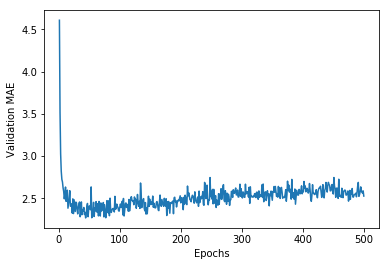

In [6]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [7]:
plt.clf()

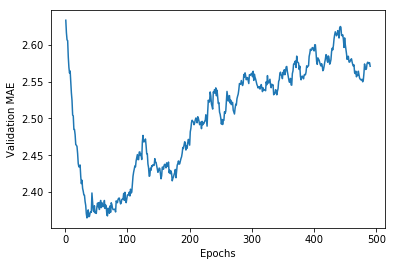

In [8]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous*factor + point*(1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history)+1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [9]:
# 根据前面的MAE分析， epochs=80 会是一个合适的模型,下面重新训练模型

model = build_network()
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=2)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

print('test_mae_score: ', test_mae_score)  # Mean Squared Error

Epoch 1/80
 - 0s - loss: 498.0036 - mean_absolute_error: 20.2080
Epoch 2/80
 - 0s - loss: 322.4004 - mean_absolute_error: 15.6762
Epoch 3/80
 - 0s - loss: 153.7631 - mean_absolute_error: 10.1761
Epoch 4/80
 - 0s - loss: 71.5769 - mean_absolute_error: 6.5457
Epoch 5/80
 - 0s - loss: 42.8156 - mean_absolute_error: 4.8007
Epoch 6/80
 - 0s - loss: 30.0600 - mean_absolute_error: 3.8877
Epoch 7/80
 - 0s - loss: 24.7554 - mean_absolute_error: 3.4618
Epoch 8/80
 - 0s - loss: 21.6404 - mean_absolute_error: 3.2160
Epoch 9/80
 - 0s - loss: 19.4741 - mean_absolute_error: 3.0423
Epoch 10/80
 - 0s - loss: 17.8595 - mean_absolute_error: 2.9149
Epoch 11/80
 - 0s - loss: 16.4678 - mean_absolute_error: 2.7844
Epoch 12/80
 - 0s - loss: 15.3255 - mean_absolute_error: 2.7269
Epoch 13/80
 - 0s - loss: 14.1515 - mean_absolute_error: 2.6608
Epoch 14/80
 - 0s - loss: 13.5514 - mean_absolute_error: 2.5366
Epoch 15/80
 - 0s - loss: 12.6258 - mean_absolute_error: 2.5195
Epoch 16/80
 - 0s - loss: 12.4015 - mean_ab